# ASSOCIATION RULES
The Objective of this assignment is to introduce students to rule mining techniques, particularly focusing on market basket analysis and provide hands on experience.
Dataset:
Use the Online retail dataset to apply the association rules.
Data Preprocessing:
Pre-process the dataset to ensure it is suitable for Association rules, this may include handling missing values, removing duplicates, and converting the data to appropriate format.  
Association Rule Mining:
•	Implement an Apriori algorithm using tool like python with libraries such as Pandas and Mlxtend etc.
•	 Apply association rule mining techniques to the pre-processed dataset to discover interesting relationships between products purchased together.
•	Set appropriate threshold for support, confidence and lift to extract meaning full rules.
Analysis and Interpretation:
•	Analyse the generated rules to identify interesting patterns and relationships between the products.
•	Interpret the results and provide insights into customer purchasing behaviour based on the discovered rules.
Interview Questions:
1.	What is lift and why is it important in Association rules?
2.	What is support and Confidence. How do you calculate them?
3.	What are some limitations or challenges of Association rules mining?



In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
!pip install mlxtend

In [44]:
retail_data = pd.read_excel('Online Retail.xlsx', header= None)

In [45]:
retail_data

,0
0,"shrimp,almonds,avocado,vegetables mix,green gr..."
1,"burgers,meatballs,eggs"
2,chutney
3,"turkey,avocado"
4,"mineral water,milk,energy bar,whole wheat rice..."
...,...
7496,"butter,light mayo,fresh bread"
7497,"burgers,frozen vegetables,eggs,french fries,ma..."
7498,chicken
7499,"escalope,green tea"


## Data Preprocessing:
Pre-process the dataset to ensure it is suitable for Association rules, this may include handling missing values, removing duplicates, and converting the data to appropriate format.  


In [46]:
retail_data.shape

(7501, 1)

In [47]:
retail_data.info

<bound method DataFrame.info of                                                       0
0     shrimp,almonds,avocado,vegetables mix,green gr...
1                                burgers,meatballs,eggs
2                                               chutney
3                                        turkey,avocado
4     mineral water,milk,energy bar,whole wheat rice...
...                                                 ...
7496                      butter,light mayo,fresh bread
7497  burgers,frozen vegetables,eggs,french fries,ma...
7498                                            chicken
7499                                 escalope,green tea
7500    eggs,frozen smoothie,yogurt cake,low fat yogurt

[7501 rows x 1 columns]>

In [48]:
retail_data.dtypes

0    object
dtype: object

In [49]:
retail_data.isnull().sum()

0    0
dtype: int64

In [50]:
all_items = retail_data[0].str.split(",").sum()
unique_items = pd.Series(all_items).unique()
unique_items

array(['shrimp', 'almonds', 'avocado', 'vegetables mix', 'green grapes',
       'whole weat flour', 'yams', 'cottage cheese', 'energy drink',
       'tomato juice', 'low fat yogurt', 'green tea', 'honey', 'salad',
       'mineral water', 'salmon', 'antioxydant juice', 'frozen smoothie',
       'spinach', 'olive oil', 'burgers', 'meatballs', 'eggs', 'chutney',
       'turkey', 'milk', 'energy bar', 'whole wheat rice',
       'whole wheat pasta', 'french fries', 'soup', 'light cream',
       'shallot', 'frozen vegetables', 'spaghetti', 'pet food', 'cookies',
       'cooking oil', 'champagne', 'chocolate', 'chicken', 'oil',
       'fresh tuna', 'tomatoes', 'black tea', 'extra dark chocolate',
       'protein bar', 'red wine', 'pasta', 'pepper', 'shampoo', 'rice',
       'sparkling water', 'ham', 'body spray', 'pancakes',
       'grated cheese', 'white wine', 'toothpaste', 'parmesan cheese',
       'fresh bread', 'ground beef', 'escalope', 'herb & pepper',
       'tomato sauce', 'magazines

In [51]:
print(retail_data.duplicated())

0       False
1       False
2       False
3       False
4       False
        ...  
7496    False
7497    False
7498     True
7499     True
7500    False
Length: 7501, dtype: bool


In [52]:
df= retail_data.copy()

In [53]:
df.duplicated().sum()

2325

In [54]:
df= df.drop_duplicates()

In [55]:
df.duplicated().sum()

0

## Association Rule Mining:
•	Implement an Apriori algorithm using tool like python with libraries such as Pandas and Mlxtend etc.
•	 Apply association rule mining techniques to the pre-processed dataset to discover interesting relationships between products purchased together.
•	Set appropriate threshold for support, confidence and lift to extract meaning full rules.


In [56]:
transaction = df[0].apply(lambda x:x.split(","))
transaction

C:\Users\Asad\anaconda3\Lib\site-packages\executing\executing.py:713: DeprecationWarning: ast.Str is deprecated and will be removed in Python 3.14; use ast.Constant instead
  right=ast.Str(s=sentinel),
C:\Users\Asad\anaconda3\Lib\ast.py:587: DeprecationWarning: Attribute s is deprecated and will be removed in Python 3.14; use value instead
  return Constant(*args, **kwargs)
C:\Users\Asad\anaconda3\Lib\site-packages\executing\executing.py:713: DeprecationWarning: ast.Str is deprecated and will be removed in Python 3.14; use ast.Constant instead
  right=ast.Str(s=sentinel),
C:\Users\Asad\anaconda3\Lib\ast.py:587: DeprecationWarning: Attribute s is deprecated and will be removed in Python 3.14; use value instead
  return Constant(*args, **kwargs)


NameError: name 'transactionfrom' is not defined

In [ ]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_array = te.fit(transaction).transform(transaction)
df_trans =  pd.DataFrame(te_array, columns=te.columns_)

df_trans.head()

In [ ]:
df_trans.shape

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules


frequent_items = apriori(df_trans, min_support = 0.001,use_colnames = True)
rules = association_rules(frequent_items, metric="lift", min_threshold=1)
\
rules

In [57]:
filtered_rules = rules[
    (rules['support'] >= 0.002) &       # at least 2% transactions
    (rules['confidence'] >= 0.2) &   # at least 30% confidence
    (rules['lift'] >= 1.1) ]  

In [58]:
filtered_rules = filtered_rules.sort_values(by = 'lift', ascending = False)

filtered_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
24099,"(fresh tuna, honey)",(fromage blanc),0.005796,0.019513,0.002318,0.400000,20.499010,1.0,0.002205,1.634145,0.956763,0.100840,0.388059,0.259406
21650,"(escalope, mushroom cream sauce)",(pasta),0.006955,0.017388,0.002318,0.333333,19.170370,1.0,0.002197,1.473918,0.954475,0.105263,0.321536,0.233333
21651,"(escalope, pasta)",(mushroom cream sauce),0.005023,0.024150,0.002318,0.461538,19.111385,1.0,0.002197,1.812293,0.952460,0.086331,0.448213,0.278769
24100,"(fromage blanc, honey)",(fresh tuna),0.004830,0.030912,0.002318,0.480000,15.528000,1.0,0.002169,1.863631,0.940141,0.069364,0.463413,0.277500
21652,"(mushroom cream sauce, pasta)",(escalope),0.002512,0.083849,0.002318,0.923077,11.008862,1.0,0.002108,11.909969,0.911453,0.027586,0.916037,0.475363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14660,"(chocolate, pepper)",(eggs),0.009274,0.208076,0.002125,0.229167,1.101362,1.0,0.000196,1.027361,0.092895,0.009874,0.026633,0.119690
45152,"(spaghetti, chocolate, shrimp)",(eggs),0.009274,0.208076,0.002125,0.229167,1.101362,1.0,0.000196,1.027361,0.092895,0.009874,0.026633,0.119690
20218,"(whole wheat rice, low fat yogurt)",(eggs),0.009274,0.208076,0.002125,0.229167,1.101362,1.0,0.000196,1.027361,0.092895,0.009874,0.026633,0.119690
1958,(grated cheese),(french fries),0.070131,0.192620,0.014876,0.212121,1.101243,1.0,0.001368,1.024752,0.098869,0.060016,0.024154,0.144676


In [59]:
filtered_rules[["antecedents", "consequents","support", "confidence", "lift"]].head(20)

,antecedents,consequents,support,confidence,lift
24099,"(fresh tuna, honey)",(fromage blanc),0.002318,0.400000,20.499010
21650,"(escalope, mushroom cream sauce)",(pasta),0.002318,0.333333,19.170370
21651,"(escalope, pasta)",(mushroom cream sauce),0.002318,0.461538,19.111385
24100,"(fromage blanc, honey)",(fresh tuna),0.002318,0.480000,15.528000
21652,"(mushroom cream sauce, pasta)",(escalope),0.002318,0.923077,11.008862
24098,"(fresh tuna, fromage blanc)",(honey),0.002318,0.666667,10.209073
70573,"(shrimp, mineral water, ground beef)","(spaghetti, frozen vegetables)",0.002512,0.342105,8.766024
31115,"(milk, pasta)",(shrimp),0.002318,0.857143,8.665179
70575,"(spaghetti, shrimp, mineral water)","(ground beef, frozen vegetables)",0.002512,0.203125,8.278543
59748,"(olive oil, tomatoes)","(spaghetti, frozen vegetables)",0.003091,0.296296,7.592226


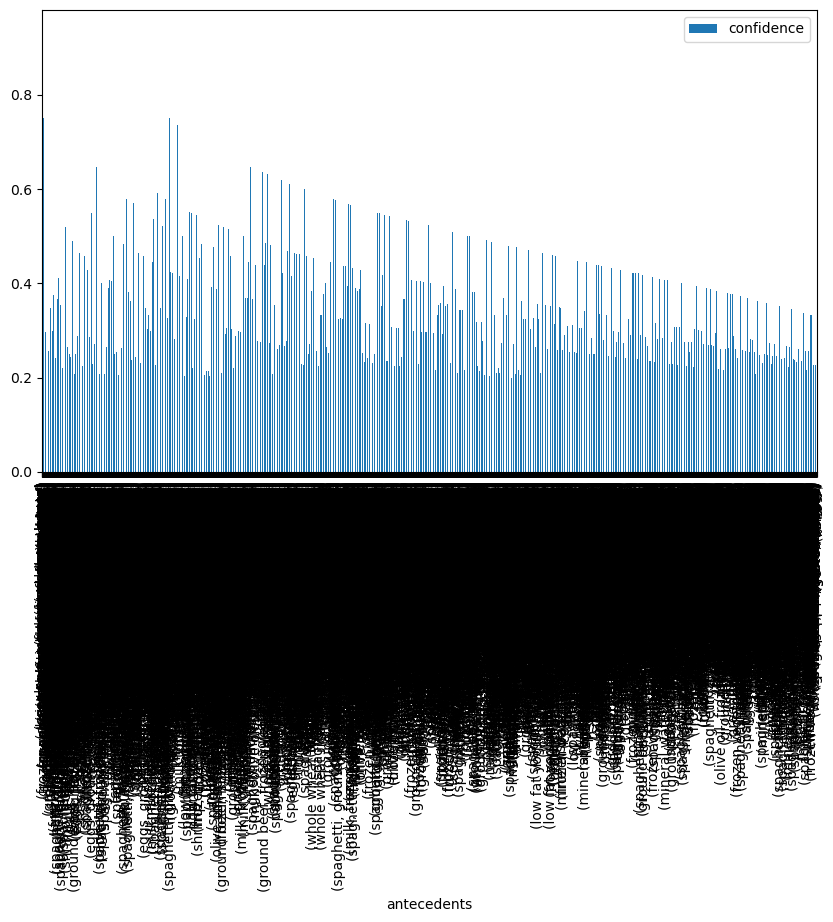

In [60]:
filtered_rules.plot( 
    x= "antecedents", y = "confidence", kind ="bar", figsize= (10,6)
)

plt.show()


# just tried for analysis purpose

## Analysis and Interpretation:
•	Analyse the generated rules to identify interesting patterns and relationships between the products.
•	Interpret the results and provide insights into customer purchasing behaviour based on the discovered rules.


## Answer

analysis of Generated Rules
Many rules show high lift values (above 10), e.g.
(fresh tuna, honey) → (fromage blanc) with lift = 20.49
(escalope, mushroom cream sauce) → (pasta) with lift = 19.17
This means these product combinations occur more often togethre than by chance

Confidence values vary:

Some rules have high confidence (e.g. (mushroom cream sauce, pasta) → escalope, confidence = 92%)
meaning whenever customers buy pasta and mushroom cream sauce, they almost always also buy escalope.
Other rules have moderate confidence (20–40%), showing weaker predictive strength.